covid_impact_on_airport_traffic

- 데이터 출처 : https://www.kaggle.com/terenceshin/covid19s-impact-on-airport-traffic

해당 데이터 설명

- 이 데이터셋은 기준 기간동안 공항으로 들어오고 나가는 트래픽을 트래픽 볼륨의 백분율로 표시합니다. <br>
  이 메트릭스를 계산하는 데 사용되는 기준 기간은 2020년 3월 16일 부터 12월 2일까지입니다.  

In [1]:
# 위치 데이터, 달성률, 날짜, 


# 날짜와 달성률 
# 1. 어느 달의 달성률이 높았는지.
# 2. 분기별로 달성률이 높았는지
# 3. 

# 위치 
# 1.
# 2.
# 3. 

## 기본 환경 구성

### 라이브러리 설치

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
plt.rc("font", family="Malgun Gothic") #한글 폰트 
plt.rc("axes", unicode_minus=False) #마이너스 코드 
from IPython.display import set_matplotlib_formats #폰트 선명하게 설정.
set_matplotlib_formats('retina')

### 데이터 불러오기

In [3]:
df = pd.read_csv('covid_impact_on_airport_traffic.csv')
df.shape

(7247, 11)

In [4]:
df.head()

,AggregationMethod,Date,Version,AirportName,PercentOfBaseline,Centroid,City,State,ISO_3166_2,Country,Geography
0,Daily,2020-04-03,1.0,Kingsford Smith,64,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
1,Daily,2020-04-13,1.0,Kingsford Smith,29,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
2,Daily,2020-07-10,1.0,Kingsford Smith,54,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
3,Daily,2020-09-02,1.0,Kingsford Smith,18,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
4,Daily,2020-10-31,1.0,Kingsford Smith,22,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."


In [5]:
df.tail()

,AggregationMethod,Date,Version,AirportName,PercentOfBaseline,Centroid,City,State,ISO_3166_2,Country,Geography
7242,Daily,2020-06-05,1.0,Seattle-Tacoma International,80,POINT(-122.308661576118 47.4505828917119),SeaTac,Washington,US-WA,United States of America (the),"POLYGON((-122.297594547272 47.434474106872, -1..."
7243,Daily,2020-10-03,1.0,Seattle-Tacoma International,55,POINT(-122.308661576118 47.4505828917119),SeaTac,Washington,US-WA,United States of America (the),"POLYGON((-122.297594547272 47.434474106872, -1..."
7244,Daily,2020-07-16,1.0,Seattle-Tacoma International,76,POINT(-122.308661576118 47.4505828917119),SeaTac,Washington,US-WA,United States of America (the),"POLYGON((-122.297594547272 47.434474106872, -1..."
7245,Daily,2020-07-31,1.0,Seattle-Tacoma International,69,POINT(-122.308661576118 47.4505828917119),SeaTac,Washington,US-WA,United States of America (the),"POLYGON((-122.297594547272 47.434474106872, -1..."
7246,Daily,2020-08-30,1.0,Seattle-Tacoma International,68,POINT(-122.308661576118 47.4505828917119),SeaTac,Washington,US-WA,United States of America (the),"POLYGON((-122.297594547272 47.434474106872, -1..."


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7247 entries, 0 to 7246
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AggregationMethod  7247 non-null   object 
 1   Date               7247 non-null   object 
 2   Version            7247 non-null   float64
 3   AirportName        7247 non-null   object 
 4   PercentOfBaseline  7247 non-null   int64  
 5   Centroid           7247 non-null   object 
 6   City               7247 non-null   object 
 7   State              7247 non-null   object 
 8   ISO_3166_2         7247 non-null   object 
 9   Country            7247 non-null   object 
 10  Geography          7247 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 622.9+ KB


In [7]:
df.describe()

,Version,PercentOfBaseline
count,7247.0,7247.000000
mean,1.0,66.651442
std,0.0,22.134433
min,1.0,0.000000
25%,1.0,53.000000
50%,1.0,67.000000
75%,1.0,84.000000
max,1.0,100.000000


In [8]:
df.columns

Index(['AggregationMethod', 'Date', 'Version', 'AirportName',
       'PercentOfBaseline', 'Centroid', 'City', 'State', 'ISO_3166_2',
       'Country', 'Geography'],
      dtype='object')

In [70]:
# <!-- 칼럼설명
# """
# Date             : 날짜
# Version          : 현재 데이터 셋이 구버전인지 현버전인지 0과 1로 나타냄.
# AirportName      : 공항 이름
# PercentOfBaseline: 회사가 얻을 수 있는 최대 목표 대비 하루 달성율
# Centroid         : 공항 좌표
# City             : 공항이 위치한 도시
# State            : 공항이 위치한 주
# Country          : 공항이 위치한 나라
# ISO_3166_2       : 주요 영토 별 국제 명칭 
# Geopgraphy       : Polygon 좌표
# """ -->

* ISO 3166-2

ISO 3166-2는 ISO 3166의 일부로서, 전 세계 나라 및 부속 영토의 주요 구성 단위의 명칭에 고유 부호를 부여하는 국제 표준이다. 1998년 처음으로 결정되어 지금까지 아홉번 개정된 바 있다. 약 3700개의 고유 부호가 있다. 정식 명칭은 'Codes for the representation of names of countries and their subdivisions – Part 2: Country subdivision code'이다.

출처 : https://ko.wikipedia.org/wiki/ISO_3166-2

In [9]:
columns = ['Version', 'AggregationMethod', 'Geography']
df = df.drop(columns, axis=1)

쓸모 없는 열들을 삭제하여 데이터 전처리를 진행하였다. 

In [10]:
df.isnull().sum()

Date                 0
AirportName          0
PercentOfBaseline    0
Centroid             0
City                 0
State                0
ISO_3166_2           0
Country              0
dtype: int64

결측치 값이 다행히도 아무도 없는 깨끗한 데이터였다. 

In [11]:
df.head()

,Date,AirportName,PercentOfBaseline,Centroid,City,State,ISO_3166_2,Country
0,2020-04-03,Kingsford Smith,64,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia
1,2020-04-13,Kingsford Smith,29,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia
2,2020-07-10,Kingsford Smith,54,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia
3,2020-09-02,Kingsford Smith,18,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia
4,2020-10-31,Kingsford Smith,22,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia


날짜 전처리

In [12]:
df["Date"] = df["Date"].astype("datetime64")


df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Quarter'] = df['Date'].dt.quarter
df['Weekday'] = df['Date'].dt.weekday

#부가설명 weekday : monday를 0으로 부터 해서 요일 나타냄

In [13]:
df.head()

,Date,AirportName,PercentOfBaseline,Centroid,City,State,ISO_3166_2,Country,Month,Day,Quarter,Weekday
0,2020-04-03,Kingsford Smith,64,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,4,3,2,4
1,2020-04-13,Kingsford Smith,29,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,4,13,2,0
2,2020-07-10,Kingsford Smith,54,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,7,10,3,4
3,2020-09-02,Kingsford Smith,18,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,9,2,3,2
4,2020-10-31,Kingsford Smith,22,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,10,31,4,5


요일이 숫자로 되어 있어서 가독성이 떨어졌다. 그래서 월화수목금토일 이라는 리스트를 만들어 함수를 만들어 요일을 표기하였다. 

In [14]:
dayofweek="월화수목금토일"

def find_dayofweek(day_no):
    dayofweek = "월화수목금토일"
    return dayofweek[day_no]


df["Weekday"]=df["Weekday"].apply(find_dayofweek) #apply 함수는 함수를 씌워주는 것이다. 

In [15]:
df.head()

,Date,AirportName,PercentOfBaseline,Centroid,City,State,ISO_3166_2,Country,Month,Day,Quarter,Weekday
0,2020-04-03,Kingsford Smith,64,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,4,3,2,금
1,2020-04-13,Kingsford Smith,29,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,4,13,2,월
2,2020-07-10,Kingsford Smith,54,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,7,10,3,금
3,2020-09-02,Kingsford Smith,18,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,9,2,3,수
4,2020-10-31,Kingsford Smith,22,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,10,31,4,토


데이터 전처리 마무리 



## EDA : 날짜

### 분기별과 성과목표 그래프

In [16]:
df_qu = pd.pivot_table(data=df, index='Quarter', values='PercentOfBaseline', aggfunc='sum')
df_qu = df_qu.reset_index()
df_qu

,Quarter,PercentOfBaseline
0,1,31939
1,2,152546
2,3,172984
3,4,125554


<AxesSubplot:xlabel='Quarter', ylabel='PercentOfBaseline'>

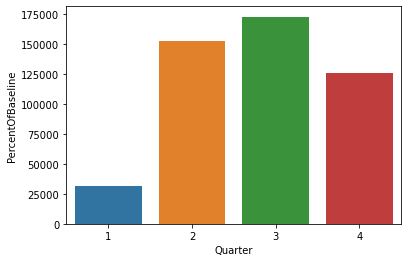

In [17]:
sns.barplot(data=df_qu,x='Quarter', y='PercentOfBaseline')

데이터 현실상, 1분기 데이터가 3월밖에 없으므로 현재 데이터 분석 시엔 제외하였고, 3분기에 업무율이 가장 높았다.  <br>
따라서 공항의 직원 수를 늘리거나 기존의 직원수를 유지하되, 추가근무가 필요할 것으로 예상된다. 

### 월별과 성과목표 그래프

In [18]:
df_month = pd.pivot_table(data=df, index='Month', values='PercentOfBaseline', aggfunc='sum')
df_month = df_month.reset_index()
df_month

,Month,PercentOfBaseline
0,3,31939
1,4,46406
2,5,50699
3,6,55441
4,7,58322
5,8,56607
6,9,58055
7,10,62472
8,11,58765
9,12,4317


데이터 수집상 마지막 날짜가 2020-12-02 이므로 하고자 하는 '월별과 성과목표 그래프'에는 영양가 없는 내용이므로 데이터를 삭제하겠다. 

In [19]:
df_month = df_month.drop(index=9).copy()
df_month

,Month,PercentOfBaseline
0,3,31939
1,4,46406
2,5,50699
3,6,55441
4,7,58322
5,8,56607
6,9,58055
7,10,62472
8,11,58765


In [61]:
df_month = df_month.drop(index=0).copy()


[Text(4, 0, '4'),
 Text(5, 0, '5'),
 Text(6, 0, '6'),
 Text(7, 0, '7'),
 Text(8, 0, '8'),
 Text(9, 0, '9'),
 Text(10, 0, '10'),
 Text(11, 0, '11')]

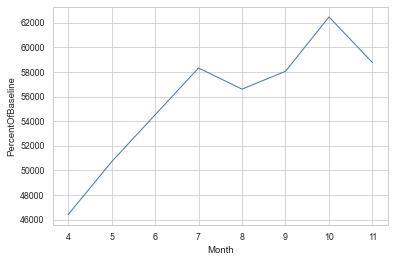

In [62]:
g = sns.lineplot(data=df_month,x='Month', y='PercentOfBaseline')
g.set_xticks(range(4,12)) 
g.set_xticklabels(['4','5','6','7','8','9','10','11'])

월별 그래프를 나타낸 결과, 월이 거듭될수록 우상향하는 모습을 보여주었다. <br>
7~8월에 꺾인 이유는 코로나가 재발이 시작되었다는 것을 유추할 수 있다. 

### 일별 총 달성율과 총 거래수 

In [94]:
percent_d = df.groupby("Day")["PercentOfBaseline"].count()
percent_d.head()

Day
1    222
2    221
3    222
4    222
5    220
Name: PercentOfBaseline, dtype: int64

<AxesSubplot:title={'center':'일별 총 거래수'}, xlabel='Day', ylabel='PercentOfBaseline'>

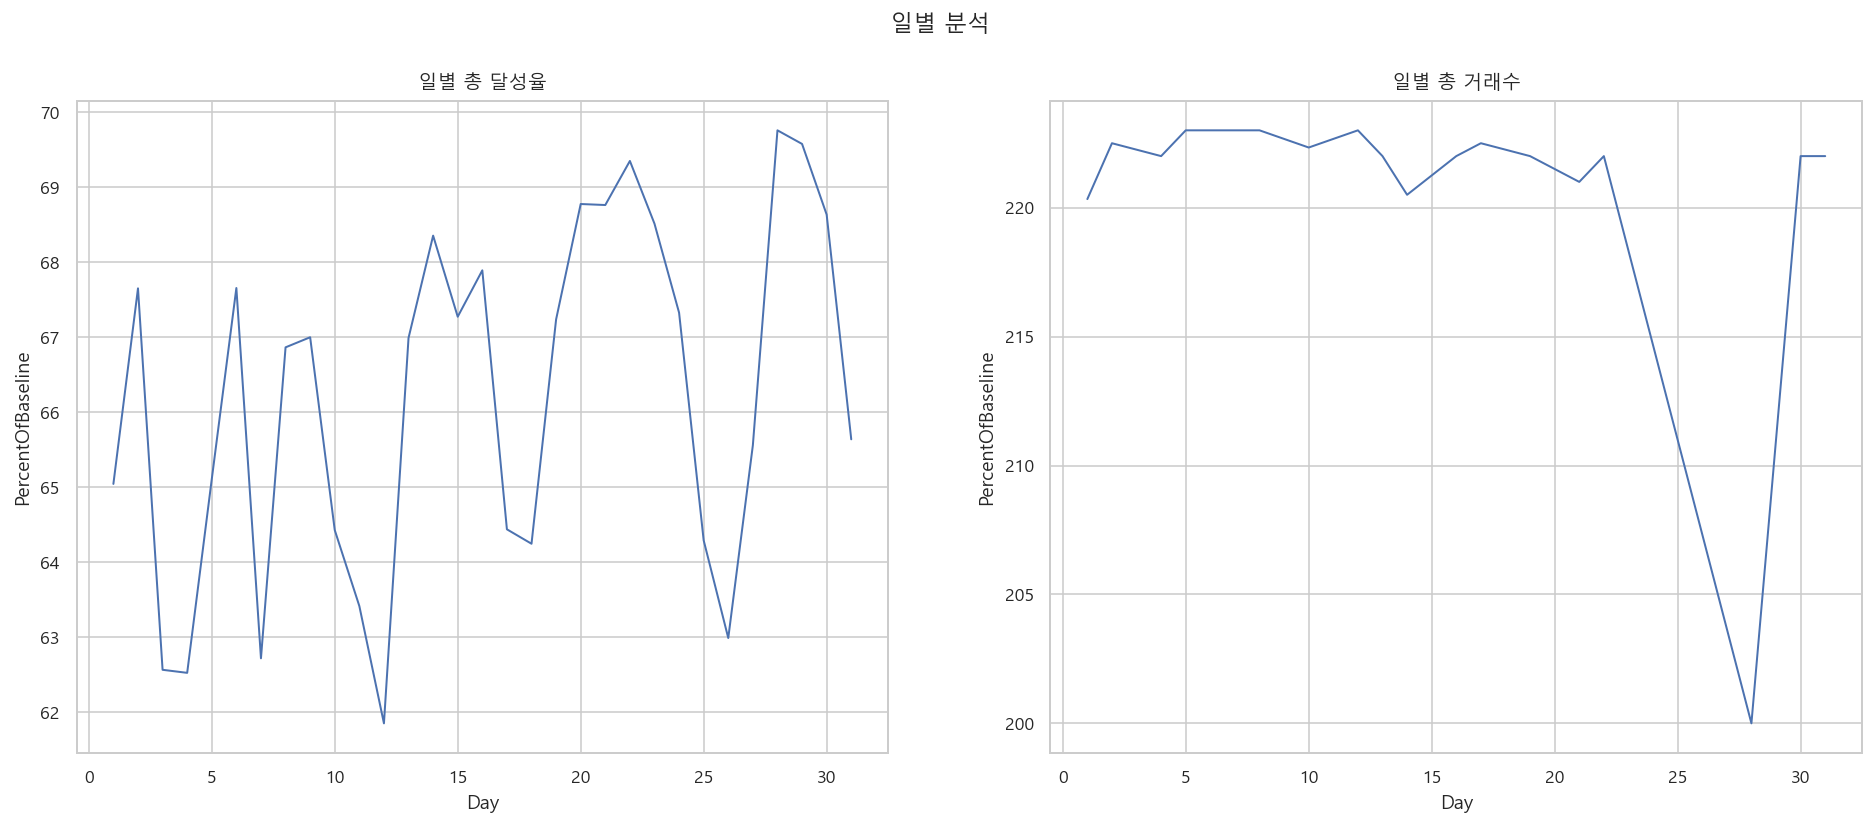

In [95]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(16, 6))
fig.suptitle('일별 분석')

axes[0].set_title('일별 총 달성율')
axes[1].set_title('일별 총 거래수')


# 일별 총 달성율
sns.lineplot(data=df, x='Day', y='PercentOfBaseline', ci=None, ax=axes[0])


# 일별 총 거래 수
percent_d = df.groupby("Day")["PercentOfBaseline"].count()
sns.lineplot(data=df, x='Day', y=percent_d, ci=None, ax=axes[1])

## EDA : 위치

### 월별 나라별의 점수 변화량

3월과 12월은 활용되지 않는 데이터이기에 삭제한다.

In [68]:
df = df.drop(df[(df["Month"] == 3) | (df["Month"] == 12)].index, axis=0).reset_index().set_index('index')

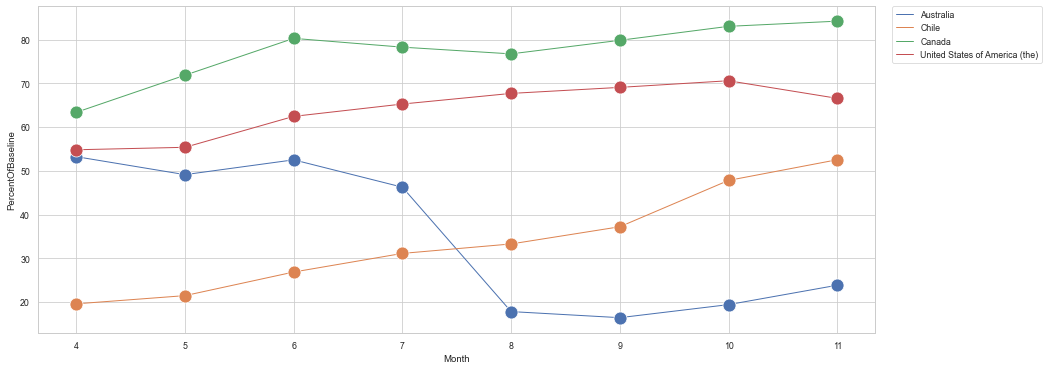

In [69]:
plt.figure(figsize=(15,6))

sns.lineplot(data=df, x="Month", y="PercentOfBaseline", hue="Country", marker='o', ci=None)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, )
paper_rc = {'lines.linewidth': 1, 'lines.markersize': 13}                  
sns.set_context("paper", rc = paper_rc)

호주는 8월에 달성율이 급격하게 떨어졌다. 이유는 코로나 확진자 수 급증으로 인해 항공수단을 방어한게 아닌가 싶다. <br>

캐나다는 꾸준하게 우상향 하고 있다. 


In [86]:
percent_d = df.groupby("Day")["PercentOfBaseline"].sum().to_frame()
percent_d.reset_index()

,Day,PercentOfBaseline
0,1,14440
1,2,14951
2,3,13890
3,4,13881
4,5,14324
5,6,14952
6,7,13924
7,8,14911
8,9,14807
9,10,14239
